In [122]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Compose
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [60]:
train_dataset = datasets.CIFAR10(root='data/', download=True, train=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data/', download=True, train=False, transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [61]:
np.set_printoptions(threshold=np.inf)
x_train = train_dataset.data
y_train = np.array(train_dataset.targets)
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)

In [62]:
# data type
print(type(x_train))

<class 'numpy.ndarray'>


In [63]:
# data shape
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000,)


In [127]:
#get image at index
index = 0
print(x_train[index])
print(y_train[index])

[[[9.0734335e-04 9.5347944e-04 9.6885813e-04]
  [6.6128414e-04 7.0742023e-04 6.9204153e-04]
  [7.6893502e-04 7.3817762e-04 6.6128414e-04]
  [1.0457517e-03 8.3044986e-04 6.4590544e-04]
  [1.5071126e-03 1.1226452e-03 7.9969241e-04]
  [1.8300654e-03 1.3994618e-03 9.6885813e-04]
  [2.1376396e-03 1.6455210e-03 1.1534026e-03]
  [2.2299117e-03 1.6916571e-03 1.2302961e-03]
  [2.2914265e-03 1.7993080e-03 1.3687044e-03]
  [2.2914265e-03 1.8454441e-03 1.4302192e-03]
  [2.0146100e-03 1.5840061e-03 1.1841600e-03]
  [1.9223376e-03 1.5224913e-03 1.1687813e-03]
  [2.1837757e-03 1.7685506e-03 1.3994618e-03]
  [2.2145330e-03 1.7224145e-03 1.3225683e-03]
  [2.1068822e-03 1.6147635e-03 1.2149174e-03]
  [1.9838526e-03 1.4917339e-03 1.0918878e-03]
  [2.1068822e-03 1.6301422e-03 1.2149174e-03]
  [2.0607461e-03 1.6301422e-03 1.1687813e-03]
  [1.9069589e-03 1.4917339e-03 9.8423695e-04]
  [2.1376396e-03 1.7377932e-03 1.1995387e-03]
  [2.1376396e-03 1.7224145e-03 1.1534026e-03]
  [2.0453674e-03 1.6147635e-03 1.0

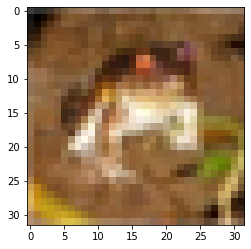

In [65]:
# image to picture
img = plt.imshow(x_train[index])

In [66]:
# get label
classes = train_dataset.classes
print("classes: ", classes)
print("lable of first image:", y_train[index], "which is a:", classes[y_train[index]])

classes:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
lable of first image: 6 which is a: frog


In [100]:
# Normalize pixels to be between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [101]:
#grayscaling function
def grayscale(theimg):
  scale = [0.2989, 0.5870, 0.1140]
  grayimg = np.sum(scale*theimg, axis = 3)
  return grayimg

In [105]:
# convert img dataset to grayscale
gx_train = grayscale(x_train)
gx_test = grayscale(x_test)
print(gx_train.shape)
print(gx_test.shape)


(50000, 32, 32)
(10000, 32, 32)


[[0.00094135 0.00069181 0.00073853 0.00087368 0.00120063 0.00147894
  0.00173635 0.00179978 0.00189713 0.00193123 0.00166697 0.00160153
  0.00185041 0.00182375 0.00171611 0.0015931  0.00172514 0.00170609
  0.00155784 0.00179577 0.00178149 0.0016802  0.00170275 0.00174888
  0.00193801 0.00210715 0.0021893  0.00207422 0.00208216 0.00210722
  0.00200593 0.00198027]
 [0.00028916 0.         0.00015496 0.00049219 0.00090172 0.00136723
  0.0014707  0.00143727 0.00145222 0.00132351 0.00118403 0.00113046
  0.00117768 0.00124881 0.00119081 0.00122966 0.0013373  0.00119983
  0.00115287 0.00145866 0.00149494 0.00139649 0.001488   0.00138211
  0.00133422 0.00148975 0.00152117 0.00156161 0.00158317 0.00145622
  0.00138393 0.0014461 ]
 [0.00036839 0.00013674 0.000483   0.00087321 0.00122748 0.00151816
  0.00153353 0.00137884 0.00128991 0.0012961  0.00130863 0.00124319
  0.00120827 0.00150304 0.00143776 0.00152626 0.00148539 0.00141753
  0.00131716 0.00140132 0.00154983 0.00156521 0.00166842 0.0014856

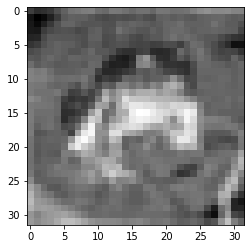

In [106]:
print(gx_train[index])
img = plt.imshow(gx_train[index], cmap = "gray")

In [107]:
#stretch images to single rows
gxtrain_rows = gx_train.reshape(gx_train.shape[0], 32 * 32)
gxtest_rows = gx_test.reshape(gx_test.shape[0], 32 * 32)
print(gxtrain_rows.shape)
print(gxtest_rows.shape)

(50000, 1024)
(10000, 1024)


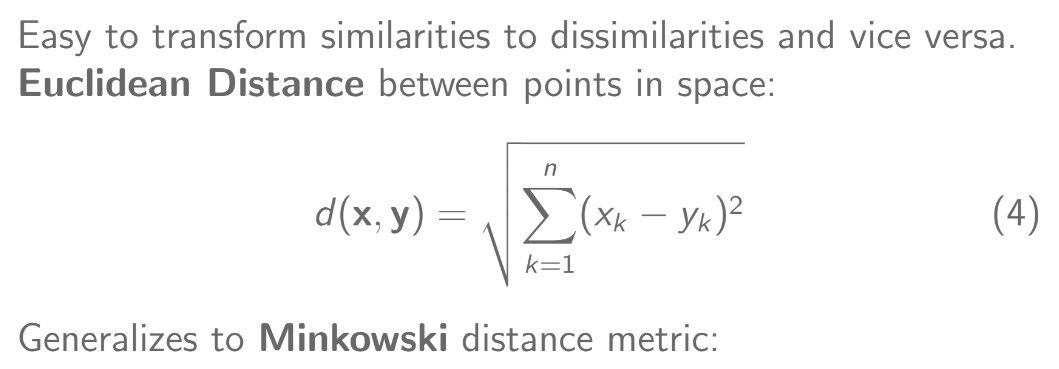


In [139]:
class kNearestNeighbor():

  def __init__(self):
    pass

  def label(self, x_train, y_train):
    self.x_trn = x_train
    self.y_trn = y_train

  def predict(self, x_test, k):
    n = x_test.shape[0]
    label_pred = np.zeros(n)

    for i in range(n):
      #print("checking image: ", i)
      #L1_dist = np.sum(np.abs(self.x_trn - x_test[i,:]), axis = 1)
      L2_dist = np.sqrt(np.sum(np.square(self.x_trn - x_test[i,:]), axis = 1))
      k_imgs = self.y_trn[np.argpartition(L2_dist, k)[:k]]
      index = stats.mode(k_imgs)[0][0]
      #print(k_imgs)
      #print(index)
      #index = np.argmin(L2_dist)
      #print(k_imgs)
      label_pred[i] = index
    return label_pred

In [ ]:
knn = kNearestNeighbor() 
knn.label(gxtrain_rows, y_train) 
Yte_predict = knn.predict(gxtest_rows[0:100], 10) 

print ('accuracy: %.2f' % ( np.mean(Yte_predict == y_test[0:100])*100 ), "%")

In [ ]:
k_values = [1,3,5,7,10]
test_size = 1000
for k in k_values:
  knn = kNearestNeighbor() 
  knn.label(gxtrain_rows, y_train)
  Yte_predict = knn.predict(gxtest_rows[0:test_size], k)
  print ('k = ' , k , ' accuracy: %.2f' % ( np.mean(Yte_predict == y_test[0:test_size])*100 ), "%") 

k =  1  accuracy: 31.70 %
